CT-475 Machine Learning & Data Mining

Assignment - 3

Categorical Classification Using Logistic Regression


Programming Language Used: Python

Date : 03rd December 2018


Team Members:

Name		: Surya Balakrishnan Ramakrishnan 
Student ID	: 18231072
Class		: 1 CSD 1 MSc Computer Science (Data Analytics)

Name		: Sai Krishna Lakshminarayanan
Student ID	: 18230229
Class		: 1 CSD 1 MSc Computer Science (Data Analytics)

Note: Sai Krishna Lakshminarayanan will be referred to as Sai Krishna and Surya Balakrishnan Ramakrishnan will be referred towards as Surya in the coding below for further correspondance.


In [1]:
#This portion of the coding till the end of second distribution plot is done by Sai Krishna Lakshminarayanan (18230229)Data Analytics
# Importing the packages required for executing the algorithm
#install the missing packages if any is present
import statistics
import random
import numpy as num
from subprocess import check_output
import pandas as panda
import matplotlib.pyplot as plot
from scipy import optimize as op
from sklearn.metrics import confusion_matrix
import csv
import seaborn as sea
from sklearn.cross_validation import train_test_split
#make sure owls.csv is present in the working directory
owls = panda.read_csv('owls.csv')# obtaining the dataset from the local disk

C:\Users\sayei\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


C:\Users\sayei\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


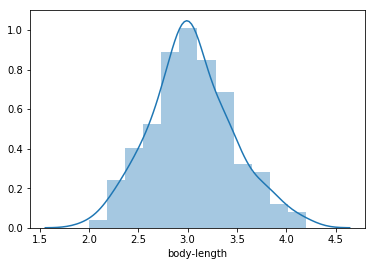

In [3]:
#Data visualisation of the owl data to get some understanding
#Distribution plot of body length
sea.distplot(owls["body-length"])
plot.savefig('body-lengthdistplot.png')#storing the output locally as a png file

C:\Users\sayei\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


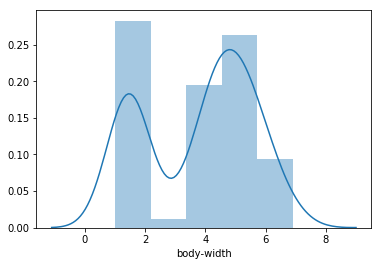

In [4]:
#Distribution plot of body width
sea.distplot(owls["body-width"])
plot.savefig('body-widthdistplot.png')

C:\Users\sayei\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


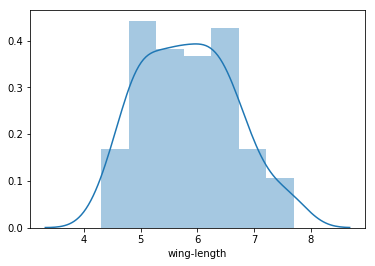

In [5]:
#This portion of the coding till the end of fourth distribution plot is done by Surya Balakrishnan Ramakrishnan (18231072)Data Analytics
#Distribution plot of wing length
sea.distplot(owls["wing-length"])
plot.savefig('wing-lengthdistplot.png')

C:\Users\sayei\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


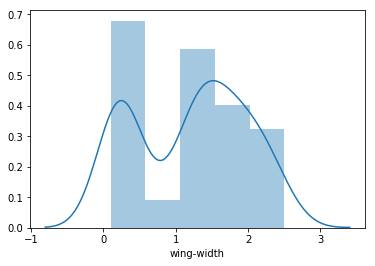

In [6]:
#Distribution plot of wing width
sea.distplot(owls["wing-width"])
plot.savefig('wing-widthdistplot.png')

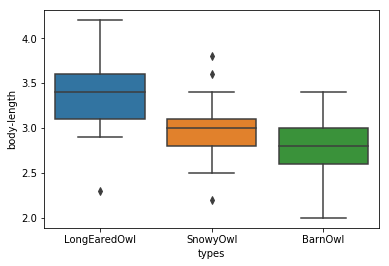

In [7]:
#The first two box plots are done by Sai Krishna
#Box plot of the owl types with respect towards the body length
sea.boxplot(x="types", y="body-length", data=owls)
plot.savefig('body-lengthboxplot.png')

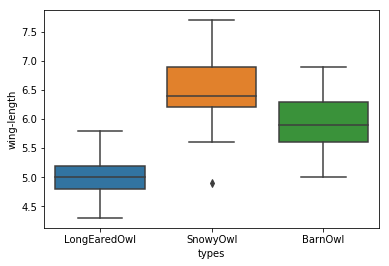

In [8]:
#Box plot of the owl types with respect towards the wing length
sea.boxplot(x="types", y="wing-length", data=owls)
plot.savefig('wing-lengthboxplot.png')

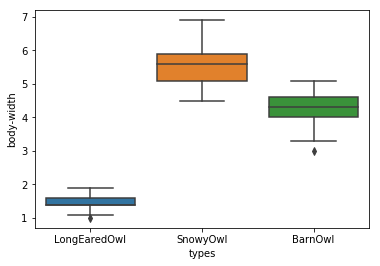

In [9]:
#The last two box plots are done by Surya
#Box plot of the owl types with respect towards the body width
sea.boxplot(x="types", y="body-width", data=owls)
plot.savefig('body-widthboxplot.png')

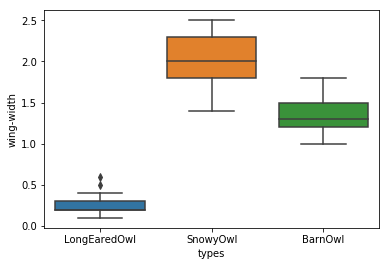

In [10]:
#Box plot of the owl types with respect towards the wing width
sea.boxplot(x="types", y="wing-width", data=owls)
plot.savefig('wing-widthboxplot.png')

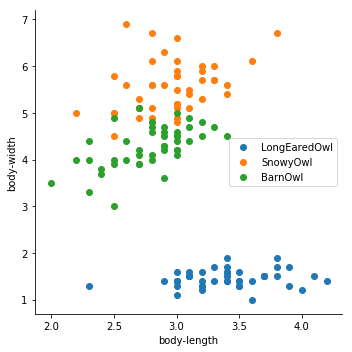

In [11]:
#first scatter plot is done by Sai Krishna
#scatter plot of the owl types with respect to body length and width
sea.FacetGrid(owls, hue="types", height=5).map(plot.scatter, "body-length", "body-width")
plot.legend(loc='center right');
plot.savefig('body-lengthVsbody-width.png')

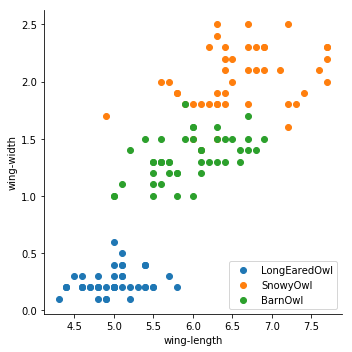

In [12]:
#second scatter plot is done by Surya
#scatter plot of the owl types with respect to wing length and width
sea.FacetGrid(owls, hue="types",height=5).map(plot.scatter, "wing-length", "wing-width")
plot.legend(loc='lower right');
plot.savefig('wing-lengthVswing-width.png')

In [15]:
#This part of the code till the start of regularised cost function is done by Sai Krishna
#Data preprocessing to perform the regression later
types = ['LongEaredOwl', 'SnowyOwl', 'BarnOwl']#the three different types of owls present
e = owls.shape[0] #Total count of the owl data set
f = 4 #No of features it has other than the target variable
g = 3#Number of classes present in the target variable types which denotes the three types of owl

X = num.ones((e,f + 1))
y = num.array((e,1))
X[:,1] = owls['body-length'].values# giving the body length values
X[:,2] = owls['wing-length'].values # giving the wing length values
X[:,3] = owls['body-width'].values# giving the body width values
X[:,4] = owls['wing-width'].values# giving the wing width values
y = owls['types'].values #labels which for which the classification is to be performed
a=10
sum=0
acc=[]
err=[]
for b in range(a): # to perform 10 iteration of the prediction and accuracy
    for j in range(f):
        X[:, j] = (X[:, j] - X[:,j].mean())
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = b*7)#randomly splitting the data
    def sigmoid(z):# to perform the sigmoid operation
        return 1.0 / (1 + num.exp(-z))
#from this till the start of accuracy is done by surya
    def regularisedcostfunction(t, X, y, l = 0.1): #Regularized cost function
        e = len(y)
        h = sigmoid(X.dot(t))
        reg = (l/(2 * e)) * num.sum(t**2)
        #regularises the cost function by adding proper weights inorder to avoid over or less values
        return (1 / e) * (-y.T.dot(num.log(h)) - (1 - y).T.dot(num.log(1 - h))) + reg

    def regularisedgradientfunction(t, X, y, l = 0.1): #Regularized gradient function
        e, f = X.shape
        t = t.reshape((f, 1))
        y = y.reshape((e, 1))
        h = sigmoid(X.dot(t))
        reg = l * t /e
        #obtaining the local minimum and minimizing the cost function
        return ((1 / e) * X.T.dot(h - y)) + reg

    def logreg(X, y, t):
        result = op.minimize(fun = regularisedcostfunction, x0 = t, args = (X, y),
                             method = 'TNC', jac = regularisedgradientfunction)
        #optimising the weights inorder to get better efficient prediction
        return result.x

    all_t = num.zeros((g, f + 1))

    #One vs all
    i = 0
    for owl in types: #set the labels in 0 and 1 to effectively do binary classification
        tmp_y = num.array(y_train == owl, dtype = int)
        optimalt = logreg(X_train, tmp_y, num.zeros((f + 1,1)))#obtaining the logistic regression for the values
        all_t[i] = optimalt#storing it in a list
        i = i+1
    #Predictions
    P = sigmoid(X_test.dot(all_t.T)) #probability for each owl
    p = [types[num.argmax(P[i, :])] for i in range(X_test.shape[0])]#based on the types
    
#From this part till the end coding is done by Sai Krishna
    count = len(["ok" for ix, label in enumerate(y_test) if label == p[ix]])
    c=(float(count) / len(y_test))*100#accuracy value
    acc.append(c)
    error=1-(c/100)#error value
    err.append(error)
    print("Test Accuracy of",b+1,"scenario is", c, '%',"\n")# Test accuracy in each iteration
    print("Error possibility of",b+1,"scenario is",error,"\n")# error in each iteration
    sum=sum+c
accuracy=sum/10 #calculating the average accuracy
print("The average accuracy after 10 times is",accuracy,"%")#average accuracy output


Test Accuracy of 1 scenario is 82.22222222222221 % 

Error possibility of 1 scenario is 0.1777777777777778 

Test Accuracy of 2 scenario is 80.0 % 

Error possibility of 2 scenario is 0.19999999999999996 

Test Accuracy of 3 scenario is 82.22222222222221 % 

Error possibility of 3 scenario is 0.1777777777777778 

Test Accuracy of 4 scenario is 88.88888888888889 % 

Error possibility of 4 scenario is 0.11111111111111116 

Test Accuracy of 5 scenario is 82.22222222222221 % 

Error possibility of 5 scenario is 0.1777777777777778 

Test Accuracy of 6 scenario is 80.0 % 

Error possibility of 6 scenario is 0.19999999999999996 

Test Accuracy of 7 scenario is 91.11111111111111 % 

Error possibility of 7 scenario is 0.0888888888888889 

Test Accuracy of 8 scenario is 77.77777777777779 % 

Error possibility of 8 scenario is 0.2222222222222221 

Test Accuracy of 9 scenario is 86.66666666666667 % 

Error possibility of 9 scenario is 0.1333333333333333 

Test Accuracy of 10 scenario is 88.8888888

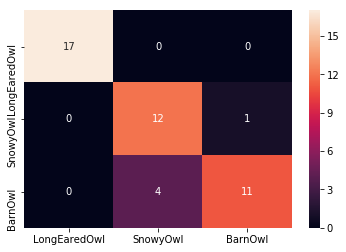

In [16]:
confusionmatrix = confusion_matrix(y_test, p, labels = types) #Regularized gradient function
sea.heatmap(confusionmatrix, annot = True, xticklabels = types, yticklabels = types);#generating heat map along for the matrix
plot.savefig('confusionmatrix.png')

In [17]:
iteration=[]
testtotal=[]
for i in range(a):
    iteration.append(i+1)#assigning the iteration values
    testtotal.append(y_test.shape[0])#assigning the test total value
final_table = panda.DataFrame(# creating a data set to store the values of iteration,test total,accuracy and error
    {
        'Number of Iteration ':iteration,
        'Test Data':testtotal,
        'Accuracy %': acc,
     'Error=(1-accuracy)': err,
    })
print(final_table)#desired output
final_table.to_csv('finaltable.csv', encoding='utf-8', index=False)#storing the end result as a csv

   Number of Iteration   Test Data  Accuracy %  Error=(1-accuracy)
0                     1         45   82.222222            0.177778
1                     2         45   80.000000            0.200000
2                     3         45   82.222222            0.177778
3                     4         45   88.888889            0.111111
4                     5         45   82.222222            0.177778
5                     6         45   80.000000            0.200000
6                     7         45   91.111111            0.088889
7                     8         45   77.777778            0.222222
8                     9         45   86.666667            0.133333
9                    10         45   88.888889            0.111111
